## Importamos librerias

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Carga y manipulación del dataset limpio

In [54]:
df = pd.read_csv("../data/processed.csv")

In [55]:
df_model = df.drop(columns=["Order_ID"])

In [56]:
df_encoded = pd.get_dummies(df_model, drop_first=True)

In [57]:
X = df_encoded.drop(columns=["Delivery_Time_min"])
y = df_encoded["Delivery_Time_min"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Entrenamiento de los modelos

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# 2. Predicciones
y_pred = linear_model.predict(X_test)

# 3. Evaluación
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("🔍 Evaluación - Regresión Lineal")
print(f"MAE:  {mae:.2f} min")
print(f"RMSE: {rmse:.2f} min")
print(f"R²:   {r2:.4f}")

🔍 Evaluación - Regresión Lineal
MAE:  5.90 min
RMSE: 8.84 min
R²:   0.8259


In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Instanciamos el modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenamos el modelo
rf_model.fit(X_train, y_train)

# Realizamos predicciones
y_pred_rf = rf_model.predict(X_test)

# Evaluación
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Evaluación - Random Forest")
print("MAE: ", round(mae_rf, 2), "min")
print("RMSE:", round(rmse_rf, 2), "min")
print("R²:  ", round(r2_rf, 4))

Evaluación - Random Forest
MAE:  7.1 min
RMSE: 10.29 min
R²:   0.7637


## Gráficación de los modelos

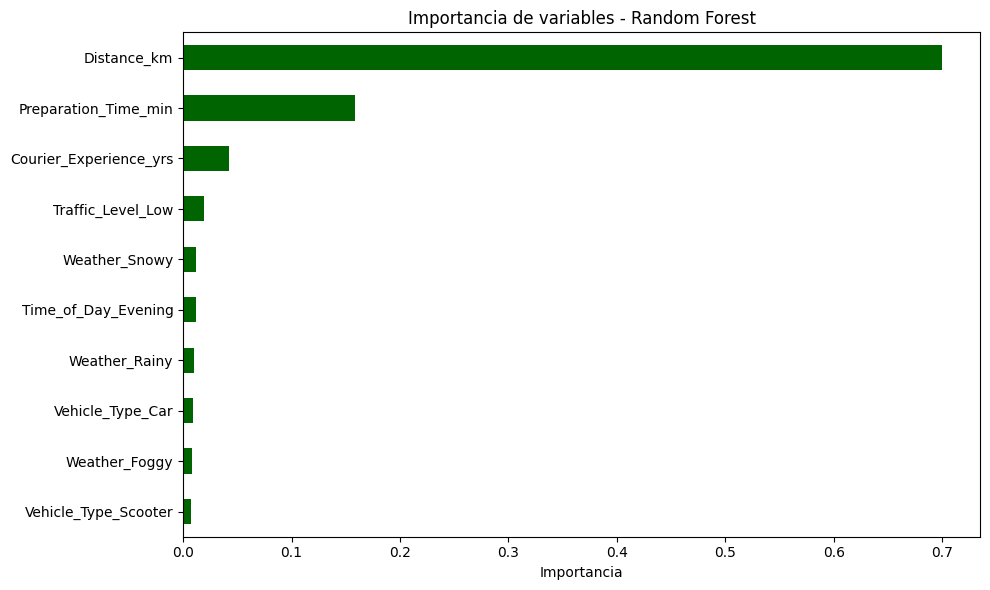

In [62]:
importances_rf = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances_rf.head(10).plot(kind="barh", color="darkgreen")
plt.title("Importancia de variables - Random Forest")
plt.xlabel("Importancia")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


,Tiempo real (min),Tiempo predicho (min)
521,32,35.288676
737,68,66.524316
740,39,44.657428
660,44,43.900258
411,85,80.013488
678,31,32.190493
626,77,69.390602
513,33,32.397470
859,90,37.508734
136,91,78.110415


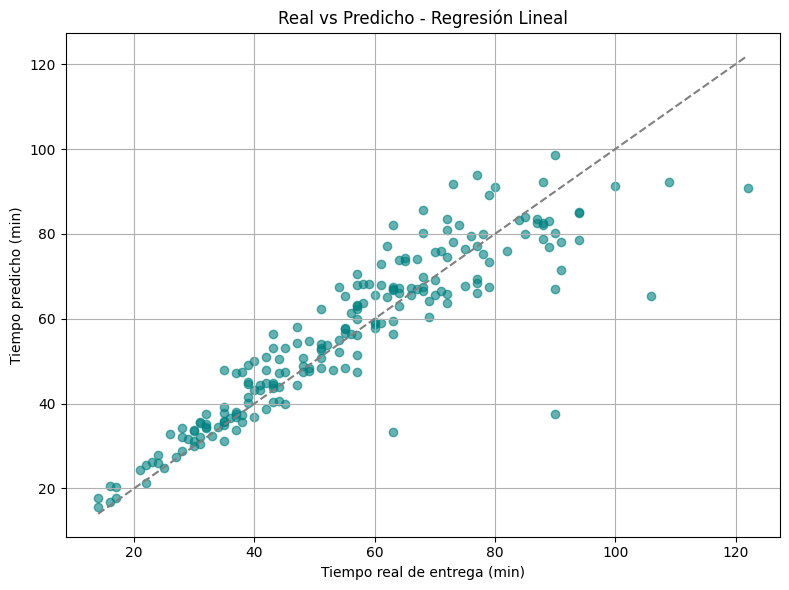

In [63]:
# Predicciones sobre el conjunto de prueba
y_pred = linear_model.predict(X_test)

# Mostrar una tabla con valores reales vs predichos
resultado_predicciones = pd.DataFrame({
    "Tiempo real (min)": y_test,
    "Tiempo predicho (min)": y_pred
})

# Mostramos los primeros 10 resultados
display(resultado_predicciones.head(10))

# (Opcional) Gráfica real vs predicho
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='gray')
plt.xlabel("Tiempo real de entrega (min)")
plt.ylabel("Tiempo predicho (min)")
plt.title("Real vs Predicho - Regresión Lineal")
plt.grid(True)
plt.tight_layout()
plt.show()

,Tiempo real (min),Tiempo predicho RF (min)
521,32,33.79
737,68,68.57
740,39,38.32
660,44,47.57
411,85,80.27
678,31,30.24
626,77,66.76
513,33,33.94
859,90,29.32
136,91,74.96


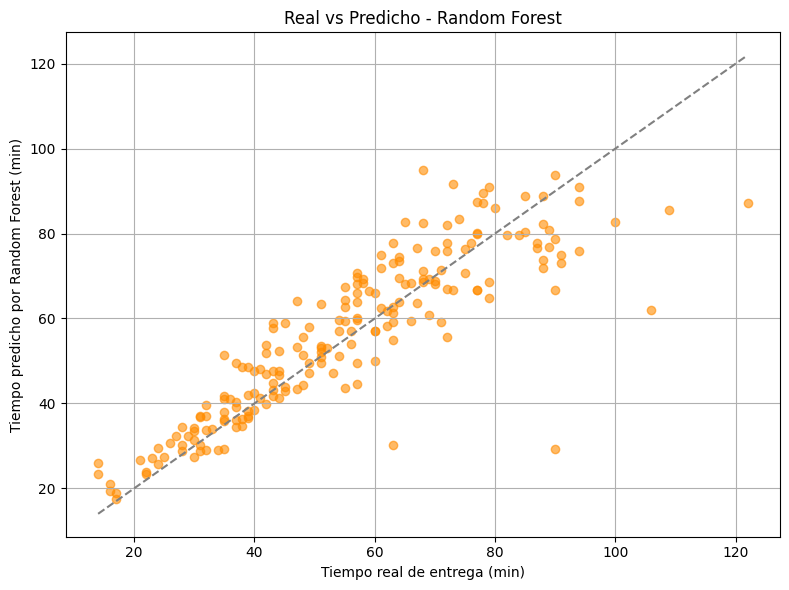

In [64]:
# Predicciones usando el modelo Random Forest
y_pred_rf = rf_model.predict(X_test)

# Mostrar una tabla con valores reales vs predichos
resultado_predicciones_rf = pd.DataFrame({
    "Tiempo real (min)": y_test,
    "Tiempo predicho RF (min)": y_pred_rf
})

# Mostramos los primeros 10 resultados
display(resultado_predicciones_rf.head(10))

# Gráfica Real vs Predicho - Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='darkorange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='gray')
plt.xlabel("Tiempo real de entrega (min)")
plt.ylabel("Tiempo predicho por Random Forest (min)")
plt.title("Real vs Predicho - Random Forest")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cálculo de métricas para Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Cálculo de métricas para Regresión Lineal
mae_lin = mean_absolute_error(y_test, y_pred)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred))
r2_lin = r2_score(y_test, y_pred)

# Crear tabla comparativa
comparacion_modelos = pd.DataFrame({
    "Modelo": ["Regresión Lineal", "Random Forest"],
    "MAE": [mae_lin, mae_rf],
    "RMSE": [rmse_lin, rmse_rf],
    "R2 Score": [r2_lin, r2_rf]
})

# Mostrar tabla
display(comparacion_modelos)

,Modelo,MAE,RMSE,R2 Score
0,Regresión Lineal,5.898472,8.835006,0.825853
1,Random Forest,7.095700,10.290769,0.763736


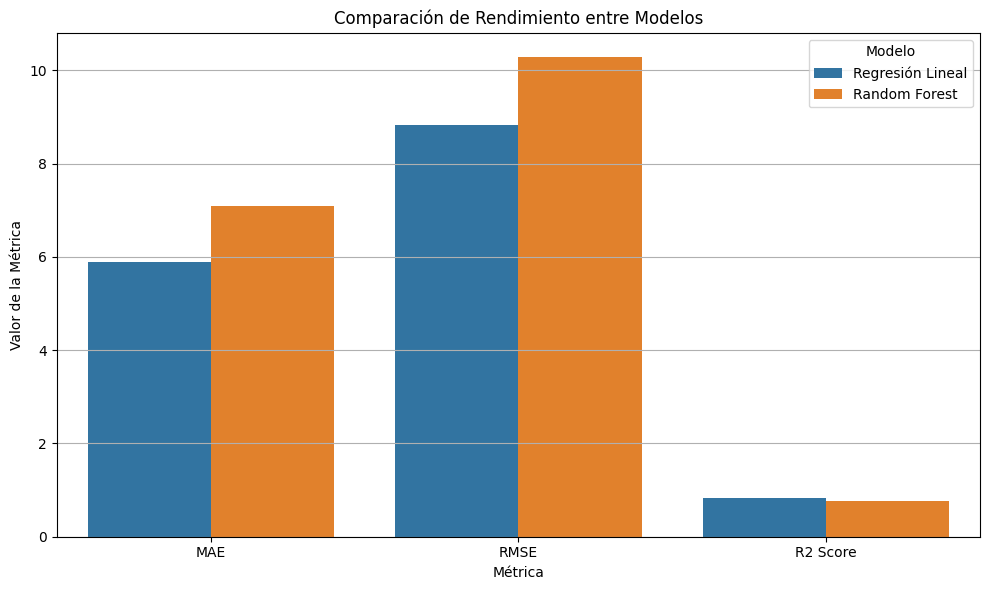

In [66]:
# Reformatear para gráfico
comparacion_melted = comparacion_modelos.melt(id_vars="Modelo", var_name="Métrica", value_name="Valor")

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=comparacion_melted, x="Métrica", y="Valor", hue="Modelo")
plt.title("Comparación de Rendimiento entre Modelos")
plt.ylabel("Valor de la Métrica")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

## Conclusiones Finales

Tras realizar el proceso de análisis exploratorio y modelado predictivo sobre los tiempos de entrega en un servicio de food delivery, se obtuvieron los siguientes hallazgos y aprendizajes clave:

Rendimiento de los Modelos
Se evaluaron dos enfoques predictivos:

Modelo	MAE (min)	RMSE (min)	R²
Regresión Lineal	5.89	8.83	0.82
Random Forest Regressor	7.09	10.29	0.76

La regresión lineal simple obtuvo mejores métricas de rendimiento: menor error absoluto medio (MAE), menor error cuadrático medio (RMSE) y mayor coeficiente de determinación (R²).

Random Forest, a pesar de ser un modelo no lineal y robusto, no superó en precisión al modelo lineal. Esto puede deberse a la estructura de los datos, que mostró patrones mayormente lineales entre las variables predictoras y el tiempo de entrega.

Importancia de las Variables
El análisis de importancia de variables en el modelo Random Forest reflejó que:

Distance_km es, con diferencia, el principal factor que explica la variabilidad en los tiempos de entrega (~70% de importancia).

Preparation_Time_min tiene una influencia moderada (~15%).

El resto de las variables (condiciones climáticas, tráfico, experiencia del repartidor, etc.) tienen un aporte menor en la predicción.

Esto respalda la hipótesis de que en servicios de entrega rápida, la distancia y preparación del pedido son los determinantes principales del tiempo total.